### <span style='color:#40E0D0'> Objetivo:

Realização de desafio de classificação de imagens de fraturas ósseas com suas diferentes classes. Buscando conhecer mais sobre o tema além de aprendar mais os conceitos.

Neste projeto e apresentação, busquei demonstrar:
- Entendimento e considerações sobre os dados de imagens
- Motivações para as escolhas tomadas
- Dificuldades encontradas e como busquei superar 

<hr>

### <span style='color:#40E0D0'> Conhecendo & Separação base:

#### Importando bibliotecas:

In [1]:
# Importar as bibliotecas necessárias:

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

import os
import PIL.Image

import time
import torch, torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

import torch.nn as nn
import torch.optim as optim


#### <span style='color:#40E0D0'> Organizando as pastas:

In [2]:
# Atribuindo à variável diretorio
dir_raw = './dados/raw/'

# Olhando quais são as classes presentes
nome_classes = os.listdir(dir_raw)
display(nome_classes)

# Quantidade de pastas
print(f'Temos {len(nome_classes)} pastas')


['Avulsion fracture',
 'Comminuted fracture',
 'Fracture Dislocation',
 'Greenstick fracture',
 'Hairline Fracture',
 'Impacted fracture',
 'Longitudinal fracture',
 'Oblique fracture',
 'Pathological fracture',
 'Spiral Fracture']

Temos 10 pastas


In [3]:
# Quantidade de imagens por classe
quat_imagens_classe = {pasta: len(os.listdir(os.path.join(dir_raw, pasta))) for pasta in nome_classes}

display(quat_imagens_classe)

{'Avulsion fracture': 123,
 'Comminuted fracture': 148,
 'Fracture Dislocation': 156,
 'Greenstick fracture': 122,
 'Hairline Fracture': 111,
 'Impacted fracture': 84,
 'Longitudinal fracture': 80,
 'Oblique fracture': 85,
 'Pathological fracture': 134,
 'Spiral Fracture': 86}

Tornando visível a quantidade por classe:

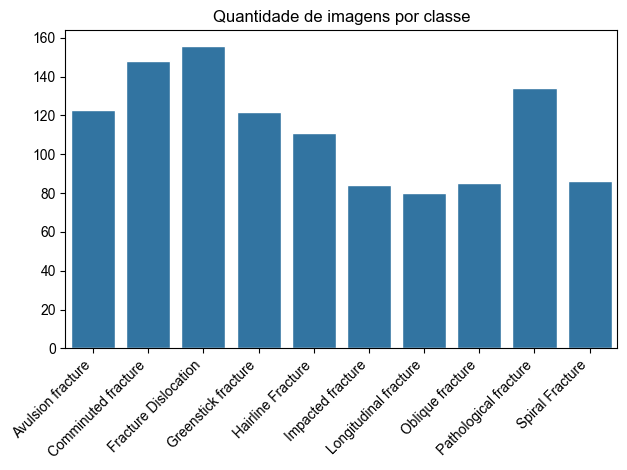

In [4]:
# Título
plt.title('Quantidade de imagens por classe')

# Definindo estilo
sns.set_style('darkgrid')

# Visualização
sns.barplot(x= quat_imagens_classe.keys(), y= quat_imagens_classe.values())

# Rotação dos nomes em xticks
plt.xticks(rotation= 45, ha= 'right')

# Ajustando o layout
plt.tight_layout()

<span style='color:#40E0D0'> Criando pasta de Treino, Validação e Teste:

In [5]:
# Caminho para a pasta de Processadas
dir_processada = './dados/processada/'

# Criando caminho do treino no diretório de 'processada'
dir_treino = os.path.join(dir_processada, 'train')

# Criando caminho da validação no diretório de 'processada'
dir_validacao = os.path.join(dir_processada, 'valid')

# Criando caminho do teste no diretório de 'processada'
dir_teste = os.path.join(dir_processada, 'test')


# Caso o caminho não exista, faça ('os.makedirs')
if not os.path.exists(dir_treino):
    os.makedirs(dir_treino)

if not os.path.exists(dir_validacao):    
    os.makedirs(dir_validacao)

if not os.path.exists(dir_teste):
    os.makedirs(dir_teste)

In [6]:
# Vendo as pastas criadas:
os.listdir(dir_processada)

['test', 'train', 'valid']

Caminho pasta 'raw': 

In [7]:
# Caminho para pasta raw
dir_raw

'./dados/raw/'

Caminho pasta 'processada':

In [8]:
# Caminho pasta processada
dir_processada

'./dados/processada/'

In [9]:
# Nome de todas as classes
nome_classes

['Avulsion fracture',
 'Comminuted fracture',
 'Fracture Dislocation',
 'Greenstick fracture',
 'Hairline Fracture',
 'Impacted fracture',
 'Longitudinal fracture',
 'Oblique fracture',
 'Pathological fracture',
 'Spiral Fracture']

#### <span style='color:#40E0D0'> Criando diretório das classes em Treino \ Validação \ Teste | Split das Bases | Encaminhando arquivos de pasta para seu destino

In [30]:
# Importando shutil para copiar arquivos de uma pasta a outra
import shutil

# Importando o 'split'
from sklearn.model_selection import train_test_split

In [46]:
# Atribuindo a variaveis dos caminhos das pastas em processada
for nome in nome_classes:
    # Criando variáveis para os caminhos dos diretórios: treino, validação e teste
    dir_treino_classe  = os.path.join(dir_treino, nome)
    dir_validacao_classe = os.path.join(dir_validacao, nome)
    dir_teste_classe = os.path.join(dir_teste, nome)
    
    # Caso nosso caminho ainda não exista, crie ('makedirs')
    if not os.path.exists(dir_treino_classe):
        os.makedirs(dir_treino_classe)

    if not os.path.exists(dir_validacao_classe):
        os.makedirs(dir_validacao_classe)
    
    if not os.path.exists(dir_teste_classe):
        os.makedirs(dir_teste_classe)
        
        
        
    # caminho completo para a pasta com imagens originais
    pasta_classe = os.path.join(dir_raw, nome)
    
    # listando todos os arquivos de imagem para essa classe
    arquivos_classe = os.listdir(pasta_classe)
    
    # separando 80% para treino e 20% para validação+teste
    treino, valid_teste = train_test_split(arquivos_classe, 
                                           shuffle=True, 
                                           test_size=0.2, 
                                           random_state=42)
    
    # separando os 20% da validação+teste em 50% para validação e 50% para teste
    validacao, teste = train_test_split(valid_teste, shuffle=True, test_size=0.5, random_state=42)
    
    
    # Copiando os arquivos efetivamente para as pastas de treino, validação e teste
    for imagem_treino in treino:
        caminho_origem = os.path.join(dir_raw, nome, imagem_treino)
        caminho_destino = os.path.join(dir_treino_classe, imagem_treino)

        shutil.copy(caminho_origem, caminho_destino)

    for imagem_validacao in validacao:
        caminho_origem = os.path.join(dir_raw, nome, imagem_validacao)
        caminho_destino = os.path.join(dir_validacao_classe, imagem_validacao)

        shutil.copy(caminho_origem, caminho_destino)

    for imagem_teste in teste:
        caminho_origem = os.path.join(dir_raw, nome, imagem_teste)
        caminho_destino = os.path.join(dir_teste_classe, imagem_teste)

        shutil.copy(caminho_origem, caminho_destino) 
    

### <span style='color:#40E0D0'> Pré processamento: 

#### <span style='color:#40E0D0'> Data Augmentation

Etapa em que as transformaçãoes das imagens ajudam a deixar nosso modelo mais robusto, conseguindo expandir nosso conjunto de dados, utilizando como base as imagens originais, mas as invertendo, girando, ampliando, etc.

Em nosso caso, utilizamos apenas a Rendimensionamento da imagem e sua transformação para tensor.

In [10]:
# Importando biblioteca para transform
from torchvision import transforms, datasets

# Definindo o tamanho da imagem
padrao_tamanho_imagem = 224

# dicionario das transformações
transformacoes =  {
    'treino': transforms.Compose([
        transforms.RandomResizedCrop(size=padrao_tamanho_imagem, scale=(0.8, 1.2)), # Realiza um corte de 80 a 120% tamanho padrão da imagem
        transforms.CenterCrop(size =160), # Realiza um corte no centro da imagem
        transforms.Resize(size=[padrao_tamanho_imagem, padrao_tamanho_imagem]), # Transforamndo para o tamanho que definimos acima
        transforms.ToTensor(), # Transformando para tensor
    ]),
    
    'validacao': transforms.Compose([
        transforms.Resize(size=([padrao_tamanho_imagem, padrao_tamanho_imagem])),  
        transforms.ToTensor(),
    ]),
    
    'teste': transforms.Compose([
        transforms.Resize(size=([padrao_tamanho_imagem, padrao_tamanho_imagem])), 
        transforms.ToTensor(),
    ]),
}


### <span style='color:#40E0D0'> Criando Datasets:

Definindo Batch & Criando Datasets (conjunto de dados que aplicaremos as transformações) de Treino e validação: 

De certa forma será útil como um 'encapsulamento' dos dados, organizando e armazenando os dados.

In [11]:
# Tamanho do batch ('punhado' de dados que vamos pegar por vez)
batch_size = 64

# Número de classes, temos 10 (cada nome das pastas que contém as imagens)
num_classes = 10 

# Criando dicionário com datasets o qual contem as imagens de seus respectivos diretórios transformadas
dataset = {
    'treino': datasets.ImageFolder(root= dir_treino, 
                                   transform= transformacoes['treino']),
    
    'validacao': datasets.ImageFolder(root= dir_validacao, 
                                      transform= transformacoes['validacao'])
}

# Olhando o dataset | Basicamente ver as características e transformações aplicadas à localização da pasta dada
display(dataset)

{'treino': Dataset ImageFolder
     Number of datapoints: 899
     Root location: ./dados/processada/train
     StandardTransform
 Transform: Compose(
                RandomResizedCrop(size=(224, 224), scale=(0.8, 1.2), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
                CenterCrop(size=(224, 224))
                Resize(size=[224, 224], interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 'validacao': Dataset ImageFolder
     Number of datapoints: 112
     Root location: ./dados/processada/valid
     StandardTransform
 Transform: Compose(
                Resize(size=[224, 224], interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            )}

In [12]:
# Nomeando índices para classes
classe_indice = {indice: classe for indice, classe in enumerate(nome_classes)}
classe_indice

{0: 'Avulsion fracture',
 1: 'Comminuted fracture',
 2: 'Fracture Dislocation',
 3: 'Greenstick fracture',
 4: 'Hairline Fracture',
 5: 'Impacted fracture',
 6: 'Longitudinal fracture',
 7: 'Oblique fracture',
 8: 'Pathological fracture',
 9: 'Spiral Fracture'}

In [13]:
# Quantidade de imagens por dataset
num_img_treino = len(dataset['treino'])
num_img_validacao = len(dataset['validacao'])

print(f'Temos {num_img_treino} imagens no dataset de treino')
print(f'Temos {num_img_validacao} imagens no dataset de validacao')

Temos 899 imagens no dataset de treino
Temos 112 imagens no dataset de validacao


### <span style='color:#40E0D0'> Criando DataLoaders:

Para os Dataloaders vamos utilizar os batches a partir dos datasets criados, além de podermos utilizar o embaralhamento das imagens. 

In [14]:
# Criando os Dataloaders
dataloader_treino = DataLoader(dataset= dataset['treino'], 
                               batch_size= batch_size, # Utilizando o batch 
                               shuffle= True) # Embaralhamento 

dataloader_validacao = DataLoader(dataset= dataset['validacao'],
                                  batch_size= batch_size,
                                  shuffle= True)

# Verificando os dataloaders
dataloader_treino, dataloader_validacao

(<torch.utils.data.dataloader.DataLoader at 0x1c01532d410>,
 <torch.utils.data.dataloader.DataLoader at 0x1c0152763d0>)

### <span style='color:#40E0D0'> TransferLearning:

Tendo em vista a presença de cerca de mil imagens a opção de usar uma Rede neural pré-treinada parece uma boa opção, uma vez que não precisariamos treinar a rede do zero e sim fazer pequenas alterações para se encaixar em nosso caso.

Exemplos como: 
- alexnet
- vgg16 
- resnet

In [15]:
# Atribuindo a variável a rede neural
alexnet = models.alexnet(pretrained= True)

# Olhando sua estrutura
alexnet

c:\Users\arthu\estudos\letsdata\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\arthu\estudos\letsdata\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

<span style='color:#40E0D0'> 'Freezando' os parâmetros:

Vamos 'congelar' os parâmetros da alexnet, não queremos que ela aprenda novamente todos os parametros

In [16]:
# O Freezing será utilizado em cada parâmetro da alexnet com o: 'required_grad = false'
for parametros in alexnet.parameters():
    parametros.requires_grad = False

<span style='color:#40E0D0'> Alterando última camada para output número de classes & Adicionando Softmax

In [17]:
# Substituindo a última camada, para sair nossas 10 classes
alexnet.classifier[6] = nn.Linear(in_features=4096, 
                                  out_features=10, 
                                  bias=True)

# Adicionando SoftMax | colocado no final irá trazer a probabilidade resultante de cada classe
alexnet.classifier.add_module('7', 
                              nn.LogSoftmax(dim= 1))

# Conferindo adição
alexnet 

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Conferindo se nova e agora penúltima camada está 'aprendendo': 

In [18]:
# Perceba que a última camada é criada já com requires_grad = True
# ou seja, queremos efetivamente que ela seja treinada
parametros_ultima_camada = alexnet.classifier[6].parameters()

[parametro for parametro in parametros_ultima_camada][0].requires_grad

True

### <span style='color:#40E0D0'> Entropia Cruzada:

Penalização de erros. útil em casos onde a probabilidade de acerto não está com disparidade tão grande. Ou seja: se a probabilidade de acerto é menor, a de errar é maior e ele irá penalizar.

In [19]:
# Atribuindo CrossEntropyLoss a uma variável
entropia_cruzada = nn.CrossEntropyLoss()

### <span style='color:#40E0D0'> Adam Optimizer :

Este optimizer ele vai ser responsável por atualizar os parametros das redes contribuindo no aprendizado. Sendo então, fundamental para o treinamento da rede neural.

In [20]:
# Otimizador para os parametros de alexnet com penalidade dos coeficientes (como o lambda das regressões ridge e lasso)
otimizador = optim.Adam(alexnet.parameters(), weight_decay= 0.01)

In [21]:
# Conferindo o otimizador
otimizador

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0.01
)

### <span style='color:#40E0D0'> Treinamento | Validação :

Classes com os índices: 

In [22]:
# Apenas relembrando as posições
classe_indice

{0: 'Avulsion fracture',
 1: 'Comminuted fracture',
 2: 'Fracture Dislocation',
 3: 'Greenstick fracture',
 4: 'Hairline Fracture',
 5: 'Impacted fracture',
 6: 'Longitudinal fracture',
 7: 'Oblique fracture',
 8: 'Pathological fracture',
 9: 'Spiral Fracture'}

#### <span style='color:#40E0D0'> Função de Treinamento e Validação do modelo: 

In [23]:
# Criando a função para o Treinamento e Validação
def treinamento_e_validacao(model,
                            criterion,
                            optimizer,
                            n_epocas = 10):
    
    # Guaremos para printar posteriomente acurácia e erros do treino e validação
    historico = []
    melhor_acuracia = 0.0
    melhor_modelo = None
    
    for epoca in range(n_epocas):
        
        # Início contador
        inicio_epoca = time.time()
        
        # Acc e Loss Treinamento:
        acertos_treino = 0.0
        erros_treino = 0.0
        
        # Acc e Loss Validação:
        acertos_validacao = 0.0
        erros_validacao = 0.0
        
        # Treinamento:
        model.train()
        
        for ind, (data, y_real) in enumerate(dataloader_treino):
            
            # Limpando os gradientes:
            optimizer.zero_grad()
            
            # Calculado saídas (são probabilidades log)
            previsao = model(data)
            
            # erros e Backpropagation dos gradientes
            erro = criterion(previsao, y_real)
            
            erro.backward()
            
            # Atualizando os parametros
            optimizer.step()
            
            
            # Erro do treino: média (é o retorno padrão) de erro do treino * n° de exemplos do nosso batch
            erros_treino += erro.item() * data.size(0)
            
            # Calculando a acurácia
            # Atribuindo a 'classe_previsao' o índice da probabilidade mais alta para certa imagem 
            classe_previsao = torch.argmax(previsao.detach(), dim= 1)
            
            # Conferindo as 'previsões' e o 'y-real'
            predicoes_corretas = (classe_previsao == y_real).type(torch.FloatTensor) # Tranformando o booleando em TensorFloat
            
            # Acertos Treino, acertos médio * n° de exemplos do nosso batch
            acertos_treino += torch.sum(predicoes_corretas)
        
        
        # Entrando na Validação: 
        # 'Desligando' auto_grad (Automatização do cálculo dos gradientes), uma vez que não teremos backpropagation na validação
        with torch.no_grad():
            
            # Modo Validação
            model.eval()
            
            for indc, (data, y_real) in enumerate(dataloader_validacao):
                # Calculado saídas (são probabilidades log)
                previsao = model(data)
                
                # Calculando o erro
                erro = criterion(previsao, y_real)
                
                # Calculando o erro na validação: média de erro * n° de exemplos do nosso batch
                erros_validacao += erro.item() * data.size(0)
                
                # Calculando a Acurácia
                classe_previsao = torch.argmax(previsao.detach(), 1)
                
                # Transformando em TensorFloat
                predicoes_corretas = (classe_previsao == y_real).type(torch.FloatTensor)
                
                # Acertos Validação, acertos médio do lote
                acertos_validacao += torch.sum(predicoes_corretas)
                
                
        # Calculando erro médio
        erro_medio_treino = erros_treino / num_img_treino
        erro_medio_validacao = erros_validacao / num_img_validacao

        # Calculate average accuracy
        acerto_medio_treino = acertos_treino / num_img_treino
        acerto_medio_validacao = acertos_validacao / num_img_validacao

        # Guardando no histórico
        historico.append([erro_medio_treino, erro_medio_validacao, acerto_medio_treino, acerto_medio_validacao])
        
        # Parando de contar o inicio_epoca
        fim_epoca = time.time()
        
        # printando os resultados
        print(f"Época: {epoca+1:03d}, "
        f"Treino - Erro: {erro_medio_treino:.4f}, Acurácia: {acerto_medio_treino*100:.4f}%, \n"
        f"Validação - Erro: {erro_medio_validacao:.4f}, Acurácia: {acerto_medio_validacao*100:.4f}%, \n"
        f"Tempo: {(fim_epoca-inicio_epoca):.4f}s")
        
        # Salvando a melhor acurácia da validação e guardando seu modelo
        if acerto_medio_treino > melhor_acuracia:
            melhor_acuracia = acerto_medio_treino
            melhor_modelo = model
    

    return melhor_modelo, historico

<span style='color:#40E0D0'> Chamando a função: 

In [24]:
# Define o número de épocas
numero_de_epocas = 50

# Chamando a função de treinamento e atribuindo suas variáveis de retorno
modelo_treinado, historico = treinamento_e_validacao(alexnet, entropia_cruzada, otimizador, numero_de_epocas)

Época: 001, Treino - Erro: 2.2381, Acurácia: 17.4638%, 
Validação - Erro: 2.1858, Acurácia: 18.7500%, 
Tempo: 9.5353s
Época: 002, Treino - Erro: 2.0343, Acurácia: 26.8076%, 
Validação - Erro: 2.2464, Acurácia: 30.3571%, 
Tempo: 9.2991s
Época: 003, Treino - Erro: 1.9169, Acurácia: 32.0356%, 
Validação - Erro: 2.1035, Acurácia: 26.7857%, 
Tempo: 9.3997s
Época: 004, Treino - Erro: 1.8411, Acurácia: 34.4828%, 
Validação - Erro: 2.1027, Acurácia: 27.6786%, 
Tempo: 9.3472s
Época: 005, Treino - Erro: 1.7569, Acurácia: 38.5984%, 
Validação - Erro: 2.0788, Acurácia: 32.1429%, 
Tempo: 9.3326s
Época: 006, Treino - Erro: 1.6818, Acurácia: 41.4905%, 
Validação - Erro: 2.1117, Acurácia: 25.8929%, 
Tempo: 9.3391s
Época: 007, Treino - Erro: 1.6392, Acurácia: 42.7141%, 
Validação - Erro: 2.1049, Acurácia: 32.1429%, 
Tempo: 9.2931s
Época: 008, Treino - Erro: 1.6176, Acurácia: 43.8265%, 
Validação - Erro: 2.1164, Acurácia: 31.2500%, 
Tempo: 9.4166s
Época: 009, Treino - Erro: 1.6214, Acurácia: 44.0489%, 


Conferindo o histórico de acertos e erros do treino e validação: 

In [25]:
# Histórico de cada época com nossos erro_medio_treino, erro_medio_validacao, acerto_medio_treino, acerto_medio_validacao: 
historico

[[2.2381088068010544, 2.185800756726946, tensor(0.1746), tensor(0.1875)],
 [2.034315850631281, 2.2464118003845215, tensor(0.2681), tensor(0.3036)],
 [1.9168966311103643, 2.1034886496407643, tensor(0.3204), tensor(0.2679)],
 [1.8411167789752014, 2.102720618247986, tensor(0.3448), tensor(0.2768)],
 [1.7568823953093888, 2.078836134501866, tensor(0.3860), tensor(0.3214)],
 [1.6818425794597198, 2.1117491040910994, tensor(0.4149), tensor(0.2589)],
 [1.6392341544551234, 2.1049140180860246, tensor(0.4271), tensor(0.3214)],
 [1.6176393095722983, 2.1163640362875804, tensor(0.4383), tensor(0.3125)],
 [1.621350701977069, 2.1273591177804128, tensor(0.4405), tensor(0.3304)],
 [1.645830102041115, 2.155496801648821, tensor(0.4149), tensor(0.2679)],
 [1.5715290111747546, 2.1058818101882935, tensor(0.4594), tensor(0.2768)],
 [1.5618476571973094, 2.143592051097325, tensor(0.4505), tensor(0.2768)],
 [1.5397539110947505, 2.1544789927346364, tensor(0.4683), tensor(0.3304)],
 [1.5155578050783134, 2.089165210

#### <span style='color:#40E0D0'> Visualizar Graficamente:

#### Criando o DataFrame Historico: 

In [26]:
# Tornar histórico em array
historico = np.array(historico)

# Criando um DataFrame
historico = pd.DataFrame(data= historico,
                         columns= ['erro_medio_treino', 'erro_medio_validacao', 'acerto_medio_treino', 'acerto_medio_validacao'], 
                         index= np.arange(1, len(historico)+1, 1))

# Noemando o índice
historico.index.name = 'Epocas'

# Transformando os acertos em porcentagem
acertos_em_porcentagem = historico[['acerto_medio_treino', 'acerto_medio_validacao']].apply(lambda x : x*100)

# Dropando colunas acertos sem estar em porcentagem
historico = historico.drop(['acerto_medio_treino', 'acerto_medio_validacao'], axis=1)
# Concatenando o DF historico com os acertos em porcentagem
historico = pd.concat([historico, acertos_em_porcentagem], axis=1)

# Visualizando o DF histórico
display(historico)

,erro_medio_treino,erro_medio_validacao,acerto_medio_treino,acerto_medio_validacao
Epocas,,,,
1,2.238109,2.185801,17.463848,18.750000
2,2.034316,2.246412,26.807564,30.357143
3,1.916897,2.103489,32.035595,26.785713
4,1.841117,2.102721,34.482759,27.678570
5,1.756882,2.078836,38.598442,32.142857
6,1.681843,2.111749,41.490546,25.892857
7,1.639234,2.104914,42.714128,32.142857
8,1.617639,2.116364,43.826473,31.250000
9,1.621351,2.127359,44.048944,33.035713


#### <span style='color:#40E0D0'> Erros Treinamento & Validação:

[]

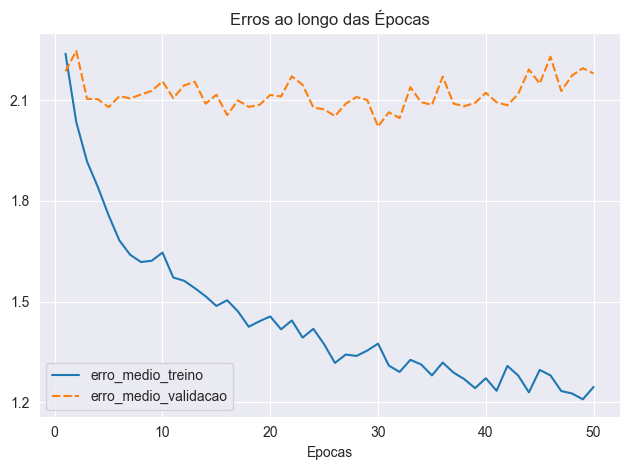

In [27]:
# Adicionando título
plt.title('Erros ao longo das Épocas')

# Estabelecendo estilo do gráfico
sns.set_style('darkgrid')

# Ticks da coluna y
plt.yticks(np.arange(0, 3, 0.3))

# Visualização de gráfico de linha
sns.lineplot(data= historico[['erro_medio_treino', 'erro_medio_validacao']])

# Ajustando o layout
plt.tight_layout()

# Plotando
plt.plot()

#### <span style='color:#40E0D0'> Acertos Treinamento & Validação:

[]

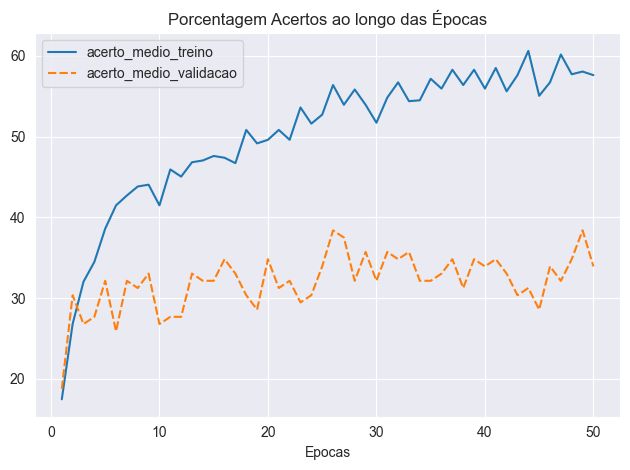

In [29]:
# Adicionando título
plt.title('Porcentagem Acertos ao longo das Épocas')

# Visualização de gráfico de linha
sns.lineplot(data= historico[['acerto_medio_treino', 'acerto_medio_validacao']])

# Ajustando o layout
plt.tight_layout()

# Plotando
plt.plot()

### <span style='color:#40E0D0'> Predição :

Realizaremos o 'forward pass' mesmo processo da validação, justamente sem o uso do autalizar os gradientes:

Olhando novamente as classes: 

In [30]:
# Só conferindo novamente nossas classes
classe_indice

{0: 'Avulsion fracture',
 1: 'Comminuted fracture',
 2: 'Fracture Dislocation',
 3: 'Greenstick fracture',
 4: 'Hairline Fracture',
 5: 'Impacted fracture',
 6: 'Longitudinal fracture',
 7: 'Oblique fracture',
 8: 'Pathological fracture',
 9: 'Spiral Fracture'}

In [31]:
# Relembrando o tamanho padrão da imagem a qual adotamos
padrao_tamanho_imagem

224

#### <span style='color:#40E0D0'> Criando Função de Predição:

Com o retorno do 'modelo_treinado', vamos realizar o forward pass, ou seja, iremos passar pela rede neural sem atualizar os gradientes da rede (algo feito durando o treinamento com o uso do erro.backward())

In [32]:
# Predição teste
def predicao_teste_fratura(imagem_teste):
    # Atribuindo à variável a transformação na posição teste
    transformacao = transformacoes['teste']
    
    # Realizando as transformações na imagem e a transformando em Tensor
    tensor_imagem_teste = transformacao(imagem_teste)
    
    # Moldando as imagens: tamanho do batch_size, os canais (RGB) e o tamanho da nossa imagem
    tensor_imagem_teste = tensor_imagem_teste.view(1, 3, padrao_tamanho_imagem , padrao_tamanho_imagem)
    
    # Criando nosso dicionário para adicionarmos nossas classificações
    dicionario_predicao = {}
    
    # Não utilizaremos o Autograd assim como na validação
    with torch.no_grad():
        
        # Segurirá basicamente a mesma ordem da validação
        modelo_treinado.eval()
        
        # Calculando saídas (são probabilidades log)
        predicao = modelo_treinado(tensor_imagem_teste)
        
        # Transformando em probabilidade, não mais log
        predicao = torch.exp(predicao)
        
        # Fazendo um Dicionário de Probabilidades, com o outro dicionário que temos o classe_indice. predicao[0][indice], na linha buscaremos o item com a coluna de posição 'indice'
        dicionario_predicao = {classe_indice[indice]: float(predicao[0][indice]) for indice in range(10)}

        
    
    return dicionario_predicao
        

#### <span style='color:#40E0D0'> Olhando Classificações:

Olhar o que está acontecendo ajuda a clarear.

tensor([[0.5601, 0.0785, 0.1696, 0.0386, 0.0358, 0.0192, 0.0042, 0.0473, 0.0058,
         0.0408]])
{'Avulsion fracture': 0.5601366758346558, 'Comminuted fracture': 0.07854533195495605, 'Fracture Dislocation': 0.16960160434246063, 'Greenstick fracture': 0.038614921271800995, 'Hairline Fracture': 0.03575602173805237, 'Impacted fracture': 0.019164536148309708, 'Longitudinal fracture': 0.004222088493406773, 'Oblique fracture': 0.047324489802122116, 'Pathological fracture': 0.00578674441203475, 'Spiral Fracture': 0.04084761068224907}


'Avulsion fracture'

tensor([[0.0879, 0.4655, 0.1659, 0.0228, 0.0168, 0.1027, 0.0389, 0.0291, 0.0473,
         0.0231]])
{'Avulsion fracture': 0.08792273700237274, 'Comminuted fracture': 0.4654829502105713, 'Fracture Dislocation': 0.16586297750473022, 'Greenstick fracture': 0.022827519103884697, 'Hairline Fracture': 0.01676766201853752, 'Impacted fracture': 0.10265259444713593, 'Longitudinal fracture': 0.03894989937543869, 'Oblique fracture': 0.029123535379767418, 'Pathological fracture': 0.04734685644507408, 'Spiral Fracture': 0.02306317910552025}


'Comminuted fracture'

tensor([[0.0616, 0.1040, 0.3415, 0.0860, 0.1982, 0.0385, 0.1106, 0.0151, 0.0277,
         0.0167]])
{'Avulsion fracture': 0.06159939989447594, 'Comminuted fracture': 0.10397233814001083, 'Fracture Dislocation': 0.3415118157863617, 'Greenstick fracture': 0.08603912591934204, 'Hairline Fracture': 0.19823485612869263, 'Impacted fracture': 0.03852160647511482, 'Longitudinal fracture': 0.11059024930000305, 'Oblique fracture': 0.015115209855139256, 'Pathological fracture': 0.02769719623029232, 'Spiral Fracture': 0.016718139871954918}


'Fracture Dislocation'

tensor([[0.0537, 0.3418, 0.2373, 0.0153, 0.0085, 0.0036, 0.0351, 0.0689, 0.0265,
         0.2093]])
{'Avulsion fracture': 0.05370553955435753, 'Comminuted fracture': 0.3417593538761139, 'Fracture Dislocation': 0.23728066682815552, 'Greenstick fracture': 0.01532203983515501, 'Hairline Fracture': 0.00846462044864893, 'Impacted fracture': 0.0036266071256250143, 'Longitudinal fracture': 0.035087503492832184, 'Oblique fracture': 0.0688706487417221, 'Pathological fracture': 0.02654358185827732, 'Spiral Fracture': 0.20933939516544342}


'Comminuted fracture'

tensor([[0.0098, 0.0362, 0.0087, 0.1322, 0.2497, 0.0067, 0.0786, 0.0232, 0.0576,
         0.3973]])
{'Avulsion fracture': 0.009789491072297096, 'Comminuted fracture': 0.03620855137705803, 'Fracture Dislocation': 0.008719784207642078, 'Greenstick fracture': 0.13223369419574738, 'Hairline Fracture': 0.24972274899482727, 'Impacted fracture': 0.006653442047536373, 'Longitudinal fracture': 0.07863898575305939, 'Oblique fracture': 0.023216456174850464, 'Pathological fracture': 0.057554543018341064, 'Spiral Fracture': 0.397262305021286}


'Spiral Fracture'

tensor([[0.0013, 0.3288, 0.0395, 0.0050, 0.0217, 0.0738, 0.0010, 0.0823, 0.3767,
         0.0698]])
{'Avulsion fracture': 0.001345269731245935, 'Comminuted fracture': 0.32880619168281555, 'Fracture Dislocation': 0.039546869695186615, 'Greenstick fracture': 0.005032724235206842, 'Hairline Fracture': 0.021661683917045593, 'Impacted fracture': 0.07377684116363525, 'Longitudinal fracture': 0.0010472311405465007, 'Oblique fracture': 0.08228890597820282, 'Pathological fracture': 0.3767370879650116, 'Spiral Fracture': 0.06975717842578888}


'Pathological fracture'

tensor([[0.2044, 0.0958, 0.0968, 0.0762, 0.0478, 0.1786, 0.0280, 0.0360, 0.1645,
         0.0719]])
{'Avulsion fracture': 0.20441840589046478, 'Comminuted fracture': 0.09578608721494675, 'Fracture Dislocation': 0.096821628510952, 'Greenstick fracture': 0.07620527595281601, 'Hairline Fracture': 0.047836512327194214, 'Impacted fracture': 0.1785976141691208, 'Longitudinal fracture': 0.027966247871518135, 'Oblique fracture': 0.035975974053144455, 'Pathological fracture': 0.16453160345554352, 'Spiral Fracture': 0.07186074554920197}


'Avulsion fracture'

tensor([[0.0114, 0.1866, 0.0617, 0.2638, 0.0428, 0.1369, 0.0159, 0.1107, 0.0886,
         0.0818]])
{'Avulsion fracture': 0.011376772075891495, 'Comminuted fracture': 0.18659614026546478, 'Fracture Dislocation': 0.06165135279297829, 'Greenstick fracture': 0.263771653175354, 'Hairline Fracture': 0.042764000594615936, 'Impacted fracture': 0.13687072694301605, 'Longitudinal fracture': 0.01589231565594673, 'Oblique fracture': 0.11069951206445694, 'Pathological fracture': 0.08859717845916748, 'Spiral Fracture': 0.08178035914897919}


'Greenstick fracture'

tensor([[0.0011, 0.1788, 0.0923, 0.0176, 0.1197, 0.0654, 0.0007, 0.0292, 0.4882,
         0.0070]])
{'Avulsion fracture': 0.0011150938225910068, 'Comminuted fracture': 0.1788201928138733, 'Fracture Dislocation': 0.09228716790676117, 'Greenstick fracture': 0.017646024003624916, 'Hairline Fracture': 0.11972521990537643, 'Impacted fracture': 0.06535045802593231, 'Longitudinal fracture': 0.0006544046336784959, 'Oblique fracture': 0.029159316793084145, 'Pathological fracture': 0.4882153868675232, 'Spiral Fracture': 0.007026772014796734}


'Pathological fracture'

tensor([[8.1574e-03, 7.8904e-03, 3.3118e-01, 3.6235e-03, 7.0113e-03, 6.7714e-04,
         7.0316e-03, 2.6660e-02, 2.7538e-04, 6.0749e-01]])
{'Avulsion fracture': 0.008157368749380112, 'Comminuted fracture': 0.007890382781624794, 'Fracture Dislocation': 0.331180602312088, 'Greenstick fracture': 0.003623494179919362, 'Hairline Fracture': 0.0070113190449774265, 'Impacted fracture': 0.0006771395565010607, 'Longitudinal fracture': 0.007031639106571674, 'Oblique fracture': 0.026660066097974777, 'Pathological fracture': 0.00027537986170500517, 'Spiral Fracture': 0.6074927449226379}


'Spiral Fracture'

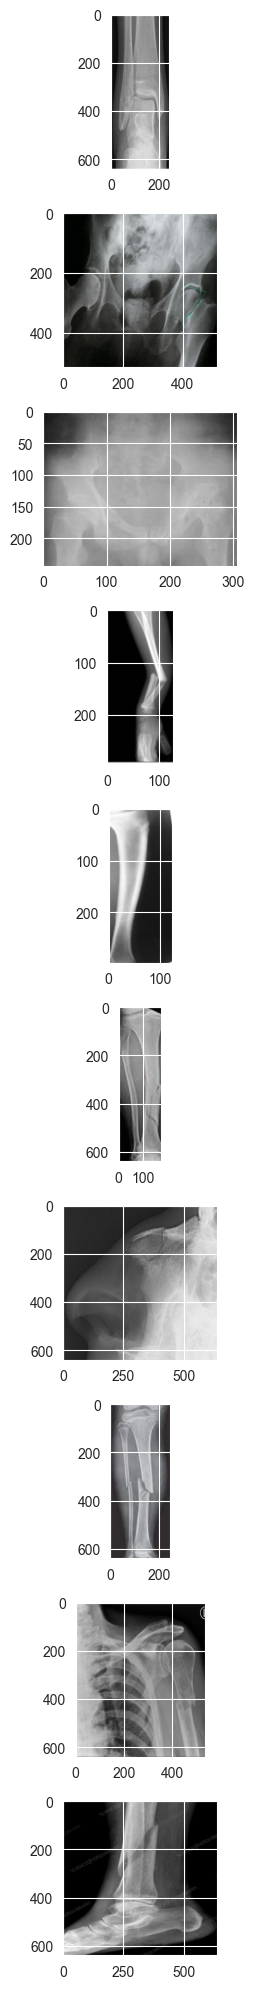

In [42]:
# Crinado figura com gráficos contendo: 10 linhas (número de classes), 1 coluna e com tamanho de figura (12, 20)
fig, axes = plt.subplots(num_classes, 1, figsize=(12, 20))

# Ajustando o layout
plt.tight_layout()


# For com os índices das classes e as classes em si
for ind, classes in enumerate(nome_classes):
    
    # Atribuindo à variável cada caminho do diretorio teste e suas pastas classes
    pasta_teste_classe = os.path.join(dir_teste, classes)
    
    # Atribuindo a variável o caminho da imagem na 1° posição de cada pasta de classe do diretório teste
    imagem = os.path.join(pasta_teste_classe, os.listdir(pasta_teste_classe)[0])
    
    # Carregando a imagem utilizando a biblioteca Pillow e atribuindo a variável imagem_teste
    imagem_teste = PIL.Image.open(imagem)
    
    # Exibindo a imagem teste no linha correta da figura
    axes[ind].imshow(imagem_teste)
    
    # Enviando a imagem de teste que selecionamos para a Função de predição com base no nosso modelo treinado
    predicoes = predicao_teste_fratura(imagem_teste)
    
    # Pegando a chave do maior probabiliade
    display(max(predicoes, key=predicoes.get))

#### <span style='color:#40E0D0'> Acurácia do teste:

In [33]:
# Criando a função de Acurácia
def acuracia_teste(pasta_teste):
    # Criando variáveis acertos e total_imagens
    acertos = total_imagens = 0
    
    # for para cada classa do diretório teste (como chamamos abaixo)
    for classe in os.listdir(pasta_teste):
        # Atribuindo o Caminho de cada paste classe do diretorio
        pasta_completa = os.path.join(pasta_teste, classe)
        
        # Total de imagens que estão em cada pasta de classe
        total_imagens += len(os.listdir(pasta_completa))
        
        # Cada caminho das imagens dentro das pastas de classes
        for imagem in os.listdir(pasta_completa):
            
            # Atribuindo a variável imagem o caminho completo para cada imagem 
            imagem = os.path.join(pasta_completa, imagem)
            
            # Carregando a imagem e atribuindo a variável, retorna um objeto 'Image'
            imagem_teste = PIL.Image.open(imagem)
            
            # Chamando a função de classificação da imagem teste. Fará com cada imagem em cada pasta classe
            predicoes = predicao_teste_fratura(imagem_teste)
            predicao = max(predicoes, key=predicoes.get)
            
            # Casp a predição feita seja condizente com a classe, então acertou. Isso, pois nosso for de classe está acima, ou seja, irá percorrer todas as imagens daquela classe antes que passe para outra. 
            if predicao == classe:
                acertos +=1
    
    # Retornar o total de acertos / pelo total de todas as imagens de todas as classes do diretório teste
    return 100 * acertos / total_imagens

Nossa Acurácia do modelo no teste:

In [34]:
# Acurácia do modelo utilizando a base de teste
print(f'Temos como acurácia em nossa base de teste de: {acuracia_teste(dir_teste):.2f}%')

Temos como acurácia em nossa base de teste de: 37.29%


<hr>

### <span style='color:#40E0D0'> Conclusão:

Como finalização, pude me instigar a explorar, aprender, ter dificuldades e buscar solucionar tais dificuldades. O desempenho do modelo não alcançou o que eu desejava, contudo, como desafio e porta de entrada a este mundo, tenho me esclarecido mais sobre diversos assuntos e instigado ainda mais curiosidade e interesse pela área.